In [1]:
from pathlib import Path
import sys
sys.path.append('../bitome-kb/')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as sparse
import seaborn as sns
from bitome.core import Bitome
from math import log,exp,inf
# [MODIFIED]
#bitome = Bitome.init_from_file('../bitome-kb/bitome.pkl')

bitome = Bitome(Path('../bitome-kb/data', 'NC_000913.3.gb'))
bitome.load_data(regulon_db=True)

/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0064
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0142
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:328: UserWarning: No GEM-PRO file found for b4586
  warn(f'No GEM-PRO file found for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b0292
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the sa

/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3039
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3453
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:328: UserWarning: No GEM-PRO file found for b4613
  warn(f'No GEM-PRO file found for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the same for b3701
  warn(f'GEM-PRO sequence and coded sequence are not the same for {locus_tag}')
/Users/ritawan/Projects/IM-ML/workflow/../bitome-kb/bitome/genbank.py:345: UserWarning: GEM-PRO sequence and coded sequence are not the sa

In [2]:
from feature_functions import *
from pymodulon.io import load_json_model
import pymodulon
# from pymodulon.visualization import *

# for plotting circos plot
# import pycircos
# import collections
# import matplotlib.pyplot as plt
# Garc    = pycircos.Garc
# Gcircle = pycircos.Gcircle

# Plotting promoter position

In [3]:
# promoter_df = pd.DataFrame(columns=['tss', 'tfbs_loc', 'strand', 'box_10', 'box_35'])

# for p in bitome.promoters:
#     if p.tss == None or p.tss < 200:
#         continue
#     if p.transcription_unit == None or len(p.transcription_unit.genes)==0:
#         continue
        
#     if len(p.tf_binding_sites) == 0:
#         continue
        
#     promoter_df.at[p.name, 'tss'] = p.tss
#     promoter_df.at[p.name, 'strand'] = p.tss_location.strand
#     tfbs_list = []
#     for s in p.tf_binding_sites:
#         tfbs = [int(s.location.start), int(s.location.end)]
#         tfbs_list.append(tfbs)

#     promoter_df.at[p.name, 'tfbs_loc'] = tfbs_list
    
#     if p.box_10_location != None:
#         promoter_df.at[p.name, 'box_10'] = [int(p.box_10_location.start),int(p.box_10_location.end)]
#         promoter_df.at[p.name, 'box_35'] = [int(p.box_35_location.start),int(p.box_35_location.end)]
#     else:
#         promoter_df.at[p.name, 'box_10'] = None
#         promoter_df.at[p.name, 'box_35'] = None
    
# promoter_df.sort_values(by='tss',inplace=True)

In [4]:
# circle = Gcircle()

# arc = Garc(arc_id='NC_000913', size=len(bitome.sequence), raxis_range=(10,0), interspace=0, linewidth=0,
#        label="Escherichia coli str. K-12 substr. MG1655", label_visible=True)

# circle.add_garc(arc)

# circle.set_garcs()

# # import collections

# circle.barplot('NC_000913', data=np.array([10]*promoter_df.shape[0]), positions=np.array(promoter_df['tss'], dtype=float), 
#                    width=np.array([50]*promoter_df.shape[0]), raxis_range=[1050,950], facecolor="k"
#                   )    

In [5]:
# positions = []
# widths = []
# for i in range(promoter_df.shape[0]):
#     if len(promoter_df['tfbs_loc'][i])>0:
#         for tfbs in promoter_df['tfbs_loc'][i]:
#             positions.append(mean(tfbs))
#             widths.append(tfbs[1]-tfbs[0])

# widths = [i*50 for i in widths] 

In [6]:
# circle.barplot('NC_000913', data=np.array([10]*len(widths)), positions=positions, 
#                    width=widths, raxis_range=[850,940], facecolor="midnightblue"
#                   )   

In [7]:
# positions = []
# widths = []
# for i in range(promoter_df.shape[0]):
#     if promoter_df['box_10'][i] != None:
#         box_10 = promoter_df['box_10'][i]
#         positions.append(mean(box_10))
#         widths.append(box_10[1]-box_10[0])
        
# widths = [i*50 for i in widths] 

In [8]:
# circle.barplot('NC_000913', data=np.array([10]*len(widths)), positions=positions, 
#                    width=widths, raxis_range=[750,840], facecolor="darkred"
#                   ) 

In [9]:
# positions = []
# widths = []
# for i in range(promoter_df.shape[0]):
#     if promoter_df['box_35'][i]!=None:
#         box_35 = promoter_df['box_35'][i]
#         positions.append(mean(box_35))
#         widths.append(box_35[1]-box_35[0])
            
# widths = [i*50 for i in widths] 

# circle.barplot('NC_000913', data=np.array([10]*len(widths)), positions=positions, 
#                    width=widths, raxis_range=[750,840], facecolor="darkred"
#                   ) 

In [10]:
# doesn't include ones that don't have tfbs

# circle.figure

In [11]:
# circle.figure.savefig("circos.pdf")

# 1. Load shape data
* Unzip ecoli_U00096_shape.pickle.zip in data folder
* change file path to the path of ecoli_U00096_shape.pickle

In [12]:
shape_table = pd.read_csv('../data/5mer_shape_lookup.csv', index_col=0)

In [13]:
bitome._shape_data = shape_table

In [14]:
bitome._load_shape_data()

,Opening,Rise,Stretch,EP,Tilt,Shear,ProT,Buckle,Shift,HelT,Stagger,Slide,MGW,Roll
AAAAA,-3.71,3.250,0.03,-10.10,-0.970,0.18,-16.51,7.80,-0.140,37.875,-0.22,-0.980,3.38,-5.070
AAAAC,-1.90,3.200,-0.01,-8.97,-1.405,0.15,-14.47,9.07,0.010,37.040,-0.06,-1.060,4.05,-4.210
AAAAG,-2.30,3.235,0.01,-10.39,-1.475,0.17,-14.68,7.39,0.045,37.100,-0.13,-1.140,3.68,-5.350
AAAAT,-2.05,3.275,-0.01,-10.80,-1.280,0.17,-14.89,7.97,0.030,37.305,-0.10,-1.150,3.63,-4.340
AAACA,-1.30,3.280,-0.01,-8.05,-0.960,0.15,-13.05,11.53,0.250,35.905,0.13,-1.300,4.65,-2.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGT,-1.70,3.300,-0.03,-7.86,-0.225,-0.09,-12.03,-2.71,0.315,35.590,-0.25,-1.095,5.21,1.765
TTTTA,-2.26,3.175,-0.02,-8.39,0.855,-0.15,-13.29,-7.24,0.180,36.160,-0.11,-1.050,4.89,-2.605
TTTTC,-2.28,3.200,-0.01,-9.65,1.080,-0.16,-13.16,-6.00,0.210,36.660,-0.16,-1.035,4.35,-3.995
TTTTG,-2.39,3.190,-0.03,-8.76,1.270,-0.15,-13.79,-7.51,0.120,36.215,-0.11,-1.040,4.76,-2.475


In [20]:
df1, df_5mer = bitome.get_shape((30,45))
df1

# 30 should be 31

,Opening,Rise,Stretch,EP,Tilt,Shear,ProT,Buckle,Shift,HelT,Stagger,Slide,MGW,Roll
30,-0.63,3.330,-0.02,-7.38,0.170,0.09,-8.33,-2.85,-0.030,33.705,-0.08,-1.495,5.32,0.795
31,-0.19,3.390,-0.02,-7.31,0.030,-0.07,-8.52,3.28,0.170,33.845,-0.17,-1.495,5.14,0.060
32,0.54,3.440,-0.04,-5.65,-0.285,-0.28,-7.10,-5.50,0.030,34.830,0.01,-1.520,5.02,1.035
33,-0.11,3.320,-0.01,-7.28,-0.215,-0.08,-8.49,-5.34,-0.040,35.425,0.01,-1.485,4.99,-2.340
34,0.16,3.320,-0.03,-5.70,0.205,0.27,-3.46,-2.75,0.000,33.965,0.10,-1.595,5.04,-1.650
35,0.00,3.350,-0.02,-7.34,0.415,-0.06,-6.62,-2.57,-0.005,33.750,-0.08,-1.685,5.00,-1.710
36,0.20,3.335,-0.03,-5.67,0.225,0.26,-3.06,-2.74,-0.035,33.390,0.10,-1.660,5.14,-1.405
37,-0.80,3.330,-0.03,-7.09,0.755,-0.08,-7.00,-2.68,0.020,33.300,-0.04,-1.525,5.33,0.895
38,0.50,3.385,-0.03,-5.48,0.020,-0.27,-8.12,-6.10,-0.030,34.470,0.02,-1.450,5.32,1.420
39,-0.94,3.330,-0.03,-6.78,0.125,-0.10,-9.33,-5.80,-0.005,34.580,0.05,-1.335,5.50,0.155


In [23]:
bitome.sequence[10-1]

'T'

In [ ]:
get_shape((189,190))

In [17]:
bitome.sequence

Seq('AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAG...TTC')

In [18]:
bitome.sequence[30:45]

Seq('TGTCTCTGTGTGGAT')

In [19]:
get_shape(30, 45, shape_table, bitome)

,Opening,Rise,Stretch,EP,Tilt,Shear,ProT,Buckle,Shift,HelT,Stagger,Slide,MGW,Roll
30,-0.19,3.390,-0.02,-7.31,0.030,-0.07,-8.52,3.28,0.170,33.845,-0.17,-1.495,5.14,0.060
31,0.54,3.440,-0.04,-5.65,-0.285,-0.28,-7.10,-5.50,0.030,34.830,0.01,-1.520,5.02,1.035
32,-0.11,3.320,-0.01,-7.28,-0.215,-0.08,-8.49,-5.34,-0.040,35.425,0.01,-1.485,4.99,-2.340
33,0.16,3.320,-0.03,-5.70,0.205,0.27,-3.46,-2.75,0.000,33.965,0.10,-1.595,5.04,-1.650
34,0.00,3.350,-0.02,-7.34,0.415,-0.06,-6.62,-2.57,-0.005,33.750,-0.08,-1.685,5.00,-1.710
35,0.20,3.335,-0.03,-5.67,0.225,0.26,-3.06,-2.74,-0.035,33.390,0.10,-1.660,5.14,-1.405
36,-0.80,3.330,-0.03,-7.09,0.755,-0.08,-7.00,-2.68,0.020,33.300,-0.04,-1.525,5.33,0.895
37,0.50,3.385,-0.03,-5.48,0.020,-0.27,-8.12,-6.10,-0.030,34.470,0.02,-1.450,5.32,1.420
38,-0.94,3.330,-0.03,-6.78,0.125,-0.10,-9.33,-5.80,-0.005,34.580,0.05,-1.335,5.50,0.155
39,0.35,3.305,-0.04,-5.00,0.050,-0.27,-8.16,-5.13,0.025,34.235,0.08,-1.320,5.73,1.820


# 2. Load IM membership

In [15]:
# [MODIFIED] change to precise1

import ast
im_info = pd.read_csv('../data/precise1_im_info.csv')

In [16]:
IM_genes = {}
for i in range(len(im_info['im_name'])):
    IM_genes[im_info['im_name'][i]] = ast.literal_eval( im_info['genes'][i] )
IM_genes.keys()

dict_keys(['GlpR', 'DhaR/Mlc', 'ArgR', 'NarL', 'MalT', 'OxyR', 'Crp-2', 'AtoC', 'PurR-1', 'CsqR', 'MetJ', 'PurR-2', 'Cbl+CysB', 'GlcC', 'Crp-1', 'YiaJ', 'GcvA', 'XylR', 'RpoH', 'GadEWX', 'PrpR', 'GadWX', 'CecR', 'ArcA-1', 'Fnr', 'CdaR', 'Pyruvate', 'SrlR+GutM', 'NagC/TyrR', 'CpxR', 'Lrp', 'Leu/Ile', 'Fur-1', 'Thiamine', 'CysB', 'FliA', 'PuuR', 'NikR', 'NtrC+RpoN', 'RcsAB', 'His-tRNA', 'Fur-2', 'Copper', 'AllR/AraC/FucR', 'Cra', 'ArcA-2', 'EvgA', 'Zinc', 'SoxS', 'Nac', 'Tryptophan', 'FadR/IclR', 'FlhDC', 'GntR/TyrR', 'RpoS', 'ExuR/FucR', 'FecI', 'RbsR'])

# 3. Load PSSMs

### Load Sigma PSSM

In [17]:
import pickle
# reading the data from the file 
with open('../data/sigma_pssm_ecoli.txt', 'rb') as handle: 
    data = handle.read()  
# reconstructing the data as dictionary 
d = pickle.loads(data)
M_prib = d['M_prib']
M_m35 = d['M_m35']
m10_seq = d['m10_seq']
m35_seq = d['m35_seq']

### Extract IM motifs

In [18]:
# n_promoters_dict = {}
# for IM in list(pwm_im.keys()):
#     if IM not in list(IM_genes.keys()):
#         continue
#     n_promoters = len(IM_motif_finder(IM))
#     n_promoters_dict[IM] = n_promoters

In [19]:
# [MODIFIED]
def IM_motif_finder(IM_name, search_range=150):
    # 150 upstream, 30 downstream
    tss_list = []
    for g in bitome.genes:
        if g.locus_tag in IM_genes[IM_name]:
            for tu in g.transcription_units:
                if tu.tss != None:
                    #print(tu.name, tu.tss, tu.location.strand)
                    tss_list.append(tu.tss)

    tss_list = sorted(list(set(tss_list)))
    #print(tss_list)
    s_range = []
    count=0
    start = tss_list[-1]
    for i in range(len(tss_list)):
        if i in range(len(tss_list))[tss_list.index(start):tss_list.index(start)+count+1]: 
            continue

        #print(tss_list[i])
        overlap_tss = [tss_list[i]]
        count = 0
        
        if i == len(tss_list)-1:
            s_range.append((tss_list[i], tss_list[i]))
            continue
        
        for r in tss_list[i+1:]:
            if tss_list[i] in range(r-search_range, r+search_range):
                overlap_tss.append(r)
                count += 1
                
            end = max(overlap_tss)
            start = min(overlap_tss)

        s_range.append((start, end))

    #print(s_range)
    s_list = []
    for (start,end) in s_range:
        s = str(bitome.sequence)[ start-search_range:end+search_range]
        s_list.append(s)
    
    motif_file = open(r'motif_sequence.fasta', 'w+')
    out = '\n'.join(['>TSS' + str(i+1) + "\n" + j for i,j in enumerate(s_list)])
    motif_file.write(out)
    motif_file.close()
        
    return s_list

In [20]:
# output will be store in a fasta file that can be pasted to MEME
# The generated im motifs are stored in ../motif_logodds.txt
s_list = IM_motif_finder('CdaR')

###  Load TF and IM motifs

In [21]:
# [MODIFIED] Correct inconsistent naming in motif_logodds.txt
pwm_db = rpwm('../data/motif_pwm_db.txt')
pwm_im = rlogodds('../data/motif_logodds.txt')
IM_motif_to_use = list( set(pwm_im.keys())&set(IM_genes.keys()) )


# <MODIFIED> Added TF genes corresponding to the manually added motif below
tf_genes = ['araC', 'arcA', 'argR','argP','baeR','basR','cysB', 'cpxR', 'cra',
       'crp', 'mlc','mqsA' ,'evgA', 'exuR', 'fadR','iclR','ihfA','ihfB','iscR','fhlA','flhD','flhC', 'fnr',
       'fur','gadE','gadW','gadX','galR','galS','gcvA', 'glpR','glrR','gntR', 'tyrR','lexA','leuO',
        'lrp', 'malT', 'metJ','nac', 'nagC','nanR' ,'narL','narP','nrdR','nsrR',
        'glnG','ompR','oxyR','pdhR','phoB','phoP','purR', 'puuR', 'rcsA','rcsB','rhaS','rutR','soxS', 'trpR', 'xylR','ydeO'
         # [MODIFIED] Added ones  
        ,'yehT', 'cbl', 'ypdB', 'ilvY', 'allR', 'yiaJ', 'zur', 'zntR', 'rbsR', 'prpR', 'cueR', 'yedW', 'cusR', 'atoC']

In [22]:
# <MODIFIED> Added manually constructed motif without alignment
tf_list =['AraC', 'ArcA', 'ArgP', 'ArgR', 'BaeR', 'BasR', 'CysB', 'CpxR', 
          'Cra', 'CRP', 'Mlc', 'MqsA', 'EvgA', 'ExuR', 'FadR', 'IclR', 'IscR', 
          'IHF', 'FhlA', 'FlhDC', 'FNR', 'Fur', 'GadE', 'GadW', 'GadX', 'GalR', 'GalS', 
          'GcvA', 'GlpR', 'GlrR', 'GntR', 'TyrR', 'LexA', 'LeuO', 'Lrp', 'MalT', 'MetJ', 'Nac', 
          'NagC', 'NanR', 'NarL', 'NarP', 'NrdR', 'NsrR', 'NtrC', 'OmpR', 'OxyR', 'PdhR', 'PhoB', 'PhoP',
          'PurR', 'PuuR', 'RcsAB', 'RhaS', 'RutR', 'SoxS', 'TrpR', 'XylR', 'YdeO'
         # [MODIFIED] Added ones
         ,'BtsR', 'Cbl', 'PyrR', 'IlvY', 'AllR', 'PlaR', 'Zur', 'ZntR', 'RbsR', 'PrpR', 'CueR', 'HprR', 'CusR', 'AtoC']

# [MODIFIED]: accounting for synonymous naming
regulon_genes={}
for TF in bitome.transcription_factors:
    #print(TF.name)
    # Only include the TF that is included in the tf_list, those are the tf that we have logodds and pwm data.
    if TF.name == 'YpdB':
        tfname = 'PyrR'
    elif TF.name == 'YehT':
        tfname = 'BtsR'
    elif TF.name == 'YiaJ':
        tfname = 'PlaR'
    elif TF.name == 'YedW':
        tfname = 'HprR'
    else:
        tfname = TF.name
    if tfname in tf_list:
        regulon_genes[tfname] = []   
        for r in TF.regulons:
                for p in list(r.regulated_promoters.values())[0]:
                    if p.transcription_unit != None and len(p.transcription_unit.genes)>0:
                        for g in p.transcription_unit.genes:
                            regulon_genes[tfname].append( g.name)

In [23]:
regulon_genes.keys()

dict_keys(['TyrR', 'ArgP', 'CpxR', 'FNR', 'CRP', 'Mlc', 'Nac', 'SoxS', 'OxyR', 'PhoB', 'CysB', 'ArcA', 'Lrp', 'FhlA', 'IscR', 'GadX', 'GadW', 'PhoP', 'NarL', 'NarP', 'EvgA', 'ArgR', 'FadR', 'IclR', 'NagC', 'CusR', 'Zur', 'GadE', 'GntR', 'ExuR', 'TrpR', 'MalT', 'PdhR', 'YdeO', 'AraC', 'RhaS', 'GcvA', 'NanR', 'GalS', 'GalR', 'GlpR', 'LexA', 'PurR', 'IlvY', 'AtoC', 'Cra', 'LeuO', 'RbsR', 'Cbl', 'XylR', 'PlaR', 'PrpR', 'AllR', 'BaeR', 'NsrR', 'NrdR', 'RutR', 'MetJ', 'MqsA', 'GlrR', 'BtsR', 'BasR', 'PyrR', 'PuuR', 'HprR', 'IHF', 'CueR', 'Fur', 'ZntR', 'NtrC', 'FlhDC', 'RcsAB', 'OmpR'])

In [24]:
# cobvert gene name and b number.
b_g = {}
for g in bitome.genes:
    b_g[g.name] = g.locus_tag

In [25]:
# test runtime
import timeit
start = timeit.default_timer()

gltX = bitome.transcription_units[220]
tempr= bitome.motif_match(pwm_im,  gltX, 'Cra' , True, True)

stop = timeit.default_timer()

print('Time: ', stop - start) 
print(tempr)

Time:  0.008041083999998477
{'Cra im Matched Motif': 'CAACGAAAACAATAATGCGTAAGGTAGAA', 'Cra im score': -531, 'Cra im upstreamTSS': 1, 'Cra im distToTSS': 16.0, 'Cra im HelT_avg': 34.78068965517242, 'Cra im HelT_range': 4.095000000000006, 'Cra im MGW_avg': 5.073448275862069, 'Cra im MGW_range': 2.3600000000000003, 'Cra im ProT_avg': -8.945862068965518, 'Cra im ProT_range': 12.99, 'Cra im Roll_avg': -0.5175862068965518, 'Cra im Roll_range': 6.425000000000001, 'Cra im HelT_max': 36.915000000000006, 'Cra im HelT_min': 32.82, 'Cra im MGW_max': 6.11, 'Cra im MGW_min': 3.75, 'Cra im ProT_max': -1.48, 'Cra im ProT_min': -14.47, 'Cra im Roll_max': 2.4800000000000004, 'Cra im Roll_min': -3.9450000000000003, 'Cra im Shift_avg': 0.025172413793103452, 'Cra im Shift_range': 0.5750000000000001, 'Cra im Slide_avg': -1.3941379310344828, 'Cra im Slide_range': 0.8500000000000001, 'Cra im Rise_avg': 3.3168965517241378, 'Cra im Rise_range': 0.3700000000000001, 'Cra im TilT_avg': 0.17310344827586208, 'Cra im

# 4. Generate feature matrix

In [24]:

# def motif_match(pwm,  tu,  name:str, isIM: bool, find_peak:bool , bitome_obj = bitome)->dict:
#     #M is the log odds matrix for the motif.
#     """
#     Return log odds score of matched motif, and whether it locates upstream to TSS, range is -100 to +50.
#     :param dict M: PWM matrix of motifs
#     :param TrancriptionUnit tu: the transcription unit to match the motif
#     :param str name: name of the motif, either TF or im motif
#     :return dict result: log odds score of matched motif, and whether it locates upstream to TSS
#     """

#     M = pwm[name]
#     motif_len = len(M)

#     def score_motif(s, M):
#         if len(s) != len(M):
#             return -inf
#         out = 0
#         for i in range( len(s)):
#             out = out + M[i][s[i]]
            
#         return out

#     if int(tu.location.strand) == -1:
#         flag = False
#     else:
#         flag = True

        
#     TSS = int( tu.tss )
    
#     # score both the sequence and its reverse complement sequence to check for repeats
#     if flag:
#         left = TSS-150
#         right = TSS+30
#         s = str(bitome_obj.sequence)[left:right]
#         s_com = complement(revstrand( str(bitome_obj.sequence)[left:right] ))
        
#     else:
#         left = TSS-30
#         right = TSS+150
#         s = complement(revstrand( str(bitome_obj.sequence)[left:right] ))
#         s_com = str(bitome_obj.sequence)[left:right]


#     scores = []
#     for i in range(0, len(s)+1 - motif_len ):
#         scores.append( score_motif(s[i:i+motif_len], M) )
    
#     for i in range(0, len(s_com)+1 - motif_len ):
#         scores.append( score_motif(s_com[i:i+motif_len], M) )

    
#     print('length',len(scores))
#     print(scores.index(max(scores)))
#     print(scores.index(sorted(scores, reverse=True)[1]))
#     print(scores.index(sorted(scores, reverse=True)[2]))
#     print(scores.index(sorted(scores, reverse=True)[3]))
#     print(scores.index(sorted(scores, reverse=True)[4]))
#     smax = max(scores)
    

    
#     # need to edit
#     for i in range ( 0, len(s)+1 - motif_len ):
#         if scores[i] == smax:
#             s_motif = s[i:i+motif_len]
#             index = i
            
            
#     if flag:
#         start = index + left
#         end = start + motif_len - 1 #inclusive

#     else:
#         end = right - index
#         start = end - motif_len + 1 #inclusive

#     if flag:
#         if (end+start)/2 <= int( tu.tss ):
#             up = 1
#         else:
#             up = 0
#     else:
#         if  (end+start)/2 >= int( tu.tss ):
#             up = 1
#         else:
#             up = 0

#     table = bitome_obj.get_shape( (start,end) )
#     helt =  list(table['HelT'])
#     roll =  list(table['Roll'])
#     mgw = list(table['MGW'])
#     prot=  list(table['ProT'])
#     shift =  list(table['Shift'])
#     slide =  list(table['Slide'])
#     rise = list(table['Rise'])
#     tilt=  list(table['TilT'])
#     buckle =  list(table['Buckle'])
#     shear =  list(table['Shear'])
#     stretch = list(table['Stretch'])
#     stagger =  list(table['Stagger'])
#     opening = list(table['Opening'])
#     ep =  list(table['EP'])

#     if isIM:
#         name = name + ' im'


#     result = { name+' Matched Motif': s_motif ,name+' score': smax, 
#               name +' upstreamTSS': up, name+' distToTSS': abs( TSS-(end+start)/2 ),
#              name+' HelT_avg': mean(helt),name+' HelT_range': max(helt)-min(helt),
#               name+' MGW_avg': mean(mgw),name+' MGW_range': max(mgw) - min(mgw),
#               name+' ProT_avg': mean(prot), name+' ProT_range': max(prot) - min(prot),
#               name+' Roll_avg': mean(roll), name+' Roll_range': max(roll) - min(roll),
#              name+' HelT_max': max(helt),name+' HelT_min': min(helt),
#               name+' MGW_max': max(mgw),name+' MGW_min': min(mgw),
#               name+' ProT_max': max(prot), name+' ProT_min': min(prot),
#               name+' Roll_max': max(roll), name+' Roll_min': min(roll),
#               name+' Shift_avg': mean(shift),name+' Shift_range': max(shift)-min(shift),
#               name+' Slide_avg': mean(slide),name+' Slide_range': max(slide) - min(slide),
#               name+' Rise_avg': mean(rise), name+' Rise_range': max(rise) - min(rise),
#               name+' TilT_avg': mean(tilt), name+' TilT_range': max(tilt) - min(tilt),
#              name+' Shift_max': max(shift),name+' Shift_min': min(shift),
#               name+' Slide_max': max(slide),name+' Slide_min': min(slide),
#               name+' Rise_max': max(rise), name+' Rise_min': min(rise),
#               name+' TilT_max': max(tilt), name+' TilT_min': min(tilt),
#              name+' Buckle_avg': mean(buckle),name+' Buckle_range': max(buckle)-min(buckle),
#               name+' Shear_avg': mean(shear),name+' Shear_range': max(shear) - min(shear),
#               name+' Stretch_avg': mean(stretch), name+' Stretch_range': max(stretch) - min(stretch),
#               name+' Stagger_avg': mean(stagger), name+' Stagger_range': max(stagger) - min(stagger),
#              name+' Buckle_max': max(buckle),name+' Buckle_min': min(buckle),
#               name+' Shear_max': max(shear),name+' Shear_min': min(shear),
#               name+' Stretch_max': max(stretch), name+' Stretch_min': min(stretch),
#               name+' Stagger_max': max(stagger), name+' Stagger_min': min(stagger),
#               name+' Opening_avg': mean(opening),name+' Opening_range': max(opening)-min(opening),
#               name+' EP_avg': mean(ep),name+' EP_range': max(ep) - min(ep),
#              name+' Opening_max': max(opening),name+' Opening_min': min(opening),
#               name+' EP_max': max(ep), name+' EP_min': min(ep), 
#              name+' start': start, name+' end': end }

#     if find_peak:
#         for shape_name in ['HelT','Roll','Shift','Slide','Rise','TilT','Buckle','Shear','Stretch',
#                            'Stagger','Opening','MGW','ProT','EP']:
#             temp_shape = list(table[ shape_name ])
#             avg_width,num_peaks,avg_dist = avg_peakwidth( temp_shape )
#             result[ name + ' '+shape_name + '_peak_width'] = avg_width
#             result[ name + ' '+shape_name + '_num_peaks'] = num_peaks
#             result[ name + ' '+shape_name + '_peak_dist'] = avg_dist

#     return result

In [25]:
# for tf in bitome.transcription_units:
#     if tf.name == 'argG':
#         cyoC = tf

In [26]:
# motif_match(pwm_db,  cyoC, 'ArgR', False, False)


In [27]:
# gltX = bitome.transcription_units[220]
# motif_match(pwm_im,  gltX, 'Cra' , True, True)


In [27]:
motif_feature = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None or int(tu.tss) < 200:
            continue
            
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        data['strand'] = int(tu.location.strand)
        data['TU_length'] = len(tu.sequence)
        data['tss'] = int(tu.tss)
        
        # replication strand
        data['leading'] = 0
        data['lagging'] = 0
        data['terminus'] = 0
        data[ str(g.replication_strand) ] = 1
        
        #sigmulon features ( sigma 38 excluded )
        for signame in m10_seq.keys():
            result = bitome.score_pribnow_m35( tu, signame, M_prib, M_m35,m10_seq,m35_seq)
            result.pop(signame+'_Matched_Prib')
            result.pop(signame+'_Matched_m35')
            data.update( result )
            
        #USR and DSR
        data['USR_AT'] = bitome.USR_AT(tu)
        data['DSR_AG'] = bitome.DSR_AG(tu)
        
        #TF and IM motif features
        for tf in list(pwm_db.keys()):
            result = bitome.motif_match(pwm_db,  tu,  tf, False,False)
            result.pop(tf+' Matched Motif')
            data.update(result)
        
        for im in IM_motif_to_use:
            result = bitome.motif_match(pwm_im,  tu, im, True,False)
            result.pop(im +' im'+' Matched Motif')
            data.update(result)
        
        #distance features    
        for tg in tf_genes:
            data['distTo_'+tg] = bitome.inter_gene_distance(g,bitome.get_gene(tg))
            
        data['distToOrigin'] = g.origin_distance
        data['distToTer'] = g.terminus_distance
        data['Ori/(Ori+Ter)'] = g.origin_distance/(g.origin_distance+g.terminus_distance)
        data['orderInOperon'] = g.position_in_operon
        
        for tf in regulon_genes.keys():
            regulon_list = regulon_genes[tf]
            data['distTo_'+tf+'_regulated'] = bitome.distToRegulon(g, regulon_list )
            
        data.update( bitome.nucleotide_composition( tu ) )
        
        motif_feature.append(data)

In [28]:
im_list = []
for i in IM_motif_to_use:
    im_list.append(i + " im")

tf_im_list = sum([im_list, list(pwm_db.keys())], [])

In [29]:
motif_data = pd.DataFrame(motif_feature)
motif_data.head()

,ID,gene,TU,strand,TU_length,tss,leading,lagging,terminus,Sigma70_Prib_Start,...,CG%,CT%,GA%,GC%,GG%,GT%,TA%,TC%,TG%,TT%
0,b0008,talB,talB,1,1040,8191,1,0,0,-13,...,0.075072,0.068335,0.070260,0.075072,0.060635,0.055823,0.044273,0.062560,0.071222,0.040423
1,b0014,dnaK,dnaK-tpke11-dnaJ,1,3251,12048,1,0,0,-11,...,0.077231,0.054154,0.076000,0.080000,0.061538,0.058769,0.036000,0.048923,0.076308,0.045231
2,b0014,dnaK,dnaK-tpke11-dnaJ,1,3176,12123,1,0,0,-13,...,0.078110,0.054488,0.075906,0.080630,0.062362,0.058583,0.036220,0.049134,0.076220,0.044724
3,b0014,dnaK,dnaK-tpke11-dnaJ,1,3155,12144,1,0,0,-15,...,0.078313,0.054851,0.075460,0.081167,0.062777,0.058973,0.036145,0.049461,0.076094,0.045022
4,b0015,dnaJ,dnaK-tpke11-dnaJ,1,3251,12048,1,0,0,-11,...,0.077231,0.054154,0.076000,0.080000,0.061538,0.058769,0.036000,0.048923,0.076308,0.045231


### DNA shape at TSS
#### HelT	Roll	Shift	Slide	Rise	TilT	Buckle	Shear	Stretch	Stagger	Opening	MGW	ProT	EP	

In [30]:
n_up = 40
n_down = 10

shape_feature = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None or int(tu.tss) < 200:
            continue
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        TSS= tu.tss
        if int(tu.location.strand) == -1:
            start = TSS - n_up
            end = TSS + n_down
        else:
            start = TSS - n_down
            end= TSS + n_up
            
        table = get_shape(start,end,shape_table,bitome)
        helt =  list(table['HelT'])
        roll =  list(table['Roll'])
        mgw = list(table['MGW'])
        prot=  list(table['ProT'])
        slide = list(table['Slide'])
        stretch = list(table['Stretch'])
        stagger = list(table['Stagger'])
        opening = list(table['Opening'])
        ep = list(table['EP'])
        shift = list(table['Shift'])
        rise = list(table['Rise'])
        tilt = list(table['TilT'])
        buckle = list(table['Buckle'])
        shear = list(table['Shear'])
        
        
        if tu.location.strand == -1:
            helt.reverse()
            mgw.reverse()
            prot.reverse()
            roll.reverse()
            slide.reverse()
            stretch.reverse()
            stagger.reverse()
            opening.reverse()
            ep.reverse()
            shift.reverse()
            rise.reverse()
            tilt.reverse()
            buckle.reverse()
            shear.reverse()
        
        # [Modified] Added updated shape features
        temp = {'HelT':helt, 'MGW':mgw,'ProT':prot, 'Roll':roll,'Slide':slide,
                'Stretch':stretch,'Stagger': stagger,'Opening':opening,'EP': ep, 
                'Shift': shift, 'Rise': rise, 'TilT': tilt, 'Buckle': buckle, 'Shear': shear}
        for shape in temp.keys():
            for i in range(51):
                index = i - 40
                data[shape+'_TSS_'+ str(index)] = temp[shape][i]
                
        shape_feature.append(data)

In [31]:
shape_data = pd.DataFrame(shape_feature)
shape_data.head()

,ID,gene,TU,HelT_TSS_-40,HelT_TSS_-39,HelT_TSS_-38,HelT_TSS_-37,HelT_TSS_-36,HelT_TSS_-35,HelT_TSS_-34,...,Shear_TSS_1,Shear_TSS_2,Shear_TSS_3,Shear_TSS_4,Shear_TSS_5,Shear_TSS_6,Shear_TSS_7,Shear_TSS_8,Shear_TSS_9,Shear_TSS_10
0,b0008,talB,talB,34.040,35.340,33.355,33.780,34.870,32.590,32.525,...,0.12,0.15,0.14,-0.28,0.06,-0.26,0.07,0.15,0.15,-0.10
1,b0014,dnaK,dnaK-tpke11-dnaJ,34.735,36.225,35.075,33.000,33.200,34.495,32.900,...,0.15,0.18,-0.16,-0.10,-0.27,-0.28,-0.29,0.26,0.11,-0.24
2,b0014,dnaK,dnaK-tpke11-dnaJ,34.230,35.045,34.210,34.345,33.210,33.865,35.550,...,-0.27,0.09,0.28,-0.28,-0.15,-0.15,-0.08,0.11,-0.26,0.08
3,b0014,dnaK,dnaK-tpke11-dnaJ,33.865,33.425,35.170,35.105,34.455,33.415,34.110,...,0.16,-0.16,-0.10,-0.25,-0.27,-0.11,0.10,-0.10,0.27,-0.27
4,b0015,dnaJ,dnaK-tpke11-dnaJ,34.735,36.225,35.075,33.000,33.200,34.495,32.900,...,0.15,0.18,-0.16,-0.10,-0.27,-0.28,-0.29,0.26,0.11,-0.24


In [32]:
data_table = pd.concat([motif_data, shape_data[shape_data.columns[3:]]], axis=1)
data_table.head()

,ID,gene,TU,strand,TU_length,tss,leading,lagging,terminus,Sigma70_Prib_Start,...,Shear_TSS_1,Shear_TSS_2,Shear_TSS_3,Shear_TSS_4,Shear_TSS_5,Shear_TSS_6,Shear_TSS_7,Shear_TSS_8,Shear_TSS_9,Shear_TSS_10
0,b0008,talB,talB,1,1040,8191,1,0,0,-13,...,0.12,0.15,0.14,-0.28,0.06,-0.26,0.07,0.15,0.15,-0.10
1,b0014,dnaK,dnaK-tpke11-dnaJ,1,3251,12048,1,0,0,-11,...,0.15,0.18,-0.16,-0.10,-0.27,-0.28,-0.29,0.26,0.11,-0.24
2,b0014,dnaK,dnaK-tpke11-dnaJ,1,3176,12123,1,0,0,-13,...,-0.27,0.09,0.28,-0.28,-0.15,-0.15,-0.08,0.11,-0.26,0.08
3,b0014,dnaK,dnaK-tpke11-dnaJ,1,3155,12144,1,0,0,-15,...,0.16,-0.16,-0.10,-0.25,-0.27,-0.11,0.10,-0.10,0.27,-0.27
4,b0015,dnaJ,dnaK-tpke11-dnaJ,1,3251,12048,1,0,0,-11,...,0.15,0.18,-0.16,-0.10,-0.27,-0.28,-0.29,0.26,0.11,-0.24


In [34]:
# for i in motif_data.columns:
#     if " start" in i:
#         print(i)

In [47]:
# distance of TF to box35 and box10.

# calculate the highest sigma score
score_col = []
for col_name in data_table.columns:
    if '_combined_score' in col_name:
        score_col.append(col_name)

max_sigmas = data_table[score_col].idxmax(axis="columns")

# compute the distance
for i, row in data_table.iterrows():
    # the following four lines get the two boxes positions for the most likely sigma (sigma with the highest scores)
    max_sigma = max_sigmas.iloc[i]
    sigma = max_sigma.split('_')[0]
    box10_start = row[sigma+'_Prib_Start']
    box35_start = row[sigma+'_m35_Start']
    
    
    # consider spacer length of the box. 
    if row['strand']==1:
        box10_pos = row['tss'] + box10_start
        box35_pos = row['tss'] + box35_start
    else:
        box10_pos = row['tss'] - box10_start
        box35_pos = row['tss'] - box35_start
        
    for tf in tf_im_list:
        if row['strand']==1:
            data_table.loc[i, tf+'_TFToBox10'] = box10_pos - data_table.loc[i, tf+' end']  
            data_table.loc[i, tf+'_TFToBox35'] = box35_pos - data_table.loc[i, tf+' end']
        else:
            data_table.loc[i, tf+'_TFToBox10'] = data_table.loc[i, tf+' start'] - box10_pos
            data_table.loc[i, tf+'_TFToBox35'] = data_table.loc[i, tf+' start'] - box35_pos

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [33]:
#Can save the result if desired (since calculation takes a while)
data_table.to_csv('../data/data_precise1_plus.csv', index = None)

## Averaging  by genes

In [25]:
#Can load the full feature matrix to start workflow here
#data_table = pd.read_csv('../data/data_precise1_plus.csv')

In [143]:
data_table['TU'].unique().shape

(1592,)

In [144]:
unique_ids = np.unique(list(data_table['ID']))

multiple_ids = {}
for n in unique_ids:
    if list(data_table['ID']).count(n) > 1:
        multiple_ids[n] = list(data_table['ID']).count(n)

remove_list = []
length = len(data_table['ID'])
for i in range(length):
    if data_table.iloc[i,0] in multiple_ids.keys():
        remove_list.append(i)

single_features = data_table.drop(remove_list)
single_features = single_features.reset_index()
single_features = single_features.drop(columns=['index'])
single_features = single_features[['ID']+list(single_features.columns)[3:]]

In [145]:
featureList = list(single_features.columns)[1:]
multi = {}
for g in multiple_ids.keys():
    multi[g] = {}
    multi[g]['ID'] = str(g)
    for f in featureList:
        multi[g][f] = 0
        
for i in range(len(data_table['ID']) ):
    if data_table['ID'][i] in multiple_ids.keys():
        for f in featureList:
            multi[ str(data_table['ID'][i]) ][f] += float(data_table[f][i]/multiple_ids[str(data_table['ID'][i])])

In [146]:
multi_table = []
for k in multi.keys():
    multi_table.append(multi[k])
multi_pd = pd.DataFrame(multi_table)

In [147]:
avg_features = single_features.append(multi_pd)
avg_features=avg_features.reset_index()
avg_features=avg_features.drop(columns=['index'])
avg_features.head()

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,ID,strand,TU_length,tss,leading,lagging,terminus,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,...,CueR_TFToBox10,CueR_TFToBox35,PrpR_TFToBox10,PrpR_TFToBox35,RbsR_TFToBox10,RbsR_TFToBox35,ZntR_TFToBox10,ZntR_TFToBox35,Zur_TFToBox10,Zur_TFToBox35
0,b0008,1.0,1040.0,8191.0,1.0,0.0,0.0,-13.0,-4.060455,1.0,...,36.0,19.0,56.0,39.0,3.0,-14.0,-1.0,-18.0,90.0,73.0
1,b0025,1.0,5897.0,21383.0,1.0,0.0,0.0,-12.0,-3.290289,1.0,...,1.0,-16.0,115.0,98.0,116.0,99.0,0.0,-17.0,51.0,34.0
2,b0034,1.0,478.0,34218.0,1.0,0.0,0.0,-13.0,-4.642584,2.0,...,7.0,-15.0,55.0,33.0,57.0,35.0,48.0,26.0,14.0,-8.0
3,b0035,-1.0,7920.0,42037.0,0.0,1.0,0.0,-12.0,-5.778186,2.0,...,43.0,16.0,32.0,5.0,56.0,29.0,18.0,-9.0,73.0,46.0
4,b0036,-1.0,7920.0,42037.0,0.0,1.0,0.0,-12.0,-5.778186,2.0,...,43.0,16.0,32.0,5.0,56.0,29.0,18.0,-9.0,73.0,46.0


Text(0.5, 0, 'upstream of -35')

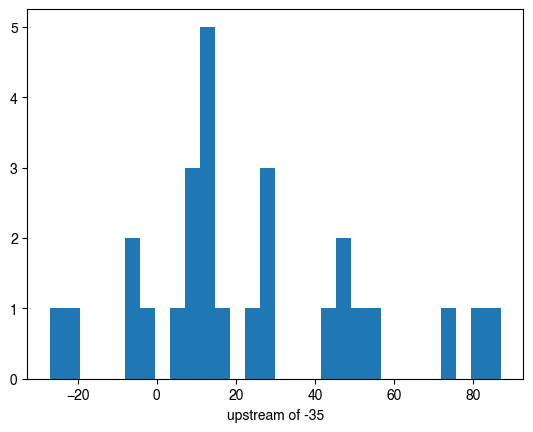

In [168]:
IM_SoxS = IM_genes['SoxS']
plt.hist(avg_features[avg_features['ID'].isin(IM_SoxS)]['SoxS_TFToBox35'],bins=30);
plt.xlabel('upstream of -35')

In [169]:
avg_features

,ID,strand,TU_length,tss,leading,lagging,terminus,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,...,CueR_TFToBox10,CueR_TFToBox35,PrpR_TFToBox10,PrpR_TFToBox35,RbsR_TFToBox10,RbsR_TFToBox35,ZntR_TFToBox10,ZntR_TFToBox35,Zur_TFToBox10,Zur_TFToBox35
0,b0008,1.0,1040.0,8191.0,1.0,0.0,0.0,-13.0,-4.060455,1.0,...,36.0,19.0,56.0,39.0,3.0,-14.0,-1.0,-18.0,90.0,73.0
1,b0025,1.0,5897.0,21383.0,1.0,0.0,0.0,-12.0,-3.290289,1.0,...,1.0,-16.0,115.0,98.0,116.0,99.0,0.0,-17.0,51.0,34.0
2,b0034,1.0,478.0,34218.0,1.0,0.0,0.0,-13.0,-4.642584,2.0,...,7.0,-15.0,55.0,33.0,57.0,35.0,48.0,26.0,14.0,-8.0
3,b0035,-1.0,7920.0,42037.0,0.0,1.0,0.0,-12.0,-5.778186,2.0,...,43.0,16.0,32.0,5.0,56.0,29.0,18.0,-9.0,73.0,46.0
4,b0036,-1.0,7920.0,42037.0,0.0,1.0,0.0,-12.0,-5.778186,2.0,...,43.0,16.0,32.0,5.0,56.0,29.0,18.0,-9.0,73.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,b4504,-1.0,3247.5,266192.5,0.0,1.0,0.0,-10.0,-7.254922,2.5,...,46.0,29.0,17.0,0.0,42.5,25.5,19.0,2.0,58.0,41.0
2590,b4616,-1.0,107.5,3853224.5,1.0,0.0,0.0,-12.5,-4.346771,1.5,...,61.5,38.5,-12.5,-35.5,55.0,32.0,23.0,0.0,61.0,38.0
2591,b4637,-1.0,1058.0,711175.0,0.0,1.0,0.0,-12.0,-3.889806,1.0,...,-12.5,-38.0,48.0,22.5,16.5,-9.0,42.5,17.0,45.5,20.0
2592,b4669,1.0,6870.0,3950254.0,1.0,0.0,0.0,-16.0,-4.407400,1.5,...,34.5,20.5,35.0,21.0,51.5,37.5,19.0,5.0,32.0,18.0


In [148]:
avg_features.to_csv('../data/features_avg_precise1_plus.csv', index=None)

## Multi-motif

1. Get the highest scored motif at the sequence itself.
2. Calculate the median/mean, variance and determine the threshold (25-75-range*C).
3. Include the reverse complement sequence and get all the motif above the threshold.
4. Calculate the distance between these additional motifs to the original motif.
    - larger than the length of motif so no overlapping
    - spacer < 5
    - there's this problem of dealing with distance between those additional motif. 
5. Include the motifs in the data table.
    - additional features (fill 0 for those don't have additional motifs)
    - add a feature of "number of motifs"
    - add the motif 

# 5. assess motif quality by t-test

In [32]:
from scipy.stats import ttest_ind

In [33]:
im_motif_ttest=[]
for name in IM_motif_to_use:
    d={}
    d['IM'] = name
    temp = []
    for i in range(len(data_table['ID'])):
        if data_table['ID'][i] in IM_genes[name]:
            temp.append(data_table[ name+ ' im score'][i])
    
    if len(temp) == 0:
        continue
        
    d['IM avg score'] = sum(temp)/len(temp)
    d['avg score'] = sum(data_table[name+ ' im score'])/len(data_table[name+ ' im score'])
    d['p value'] = ttest_ind(temp, list(data_table[name+ ' im score'])).pvalue 
    im_motif_ttest.append(d)

pvalueTable = pd.DataFrame(im_motif_ttest)
pvalueTable = pvalueTable.dropna()
pvalueTable = pvalueTable.sort_values(by=['p value'])
pvalueTable = pvalueTable.reset_index()
pvalueTable = pvalueTable.drop(columns=['index'])
pvalueTable

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


,IM,IM avg score,avg score,p value
0,CysB,1375.157895,-7613.494661,2.697726e-130
1,Cra,2176.800000,-1578.247331,9.701009e-93
2,Nac,1729.833333,-147.677427,6.691494e-91
3,FlhDC,-970.888889,-4972.265706,1.236322e-89
4,Lrp,1614.400000,-302.338962,1.182460e-87
5,RpoS,1048.944444,401.789918,2.113009e-62
6,Fur-1,830.086957,-2055.628508,2.693030e-61
7,PrpR,-4047.300000,-9101.601192,2.352484e-25
8,ArcA-2,-420.323529,-2279.515520,4.946994e-24
9,ArcA-1,836.226415,160.010678,8.456473e-20


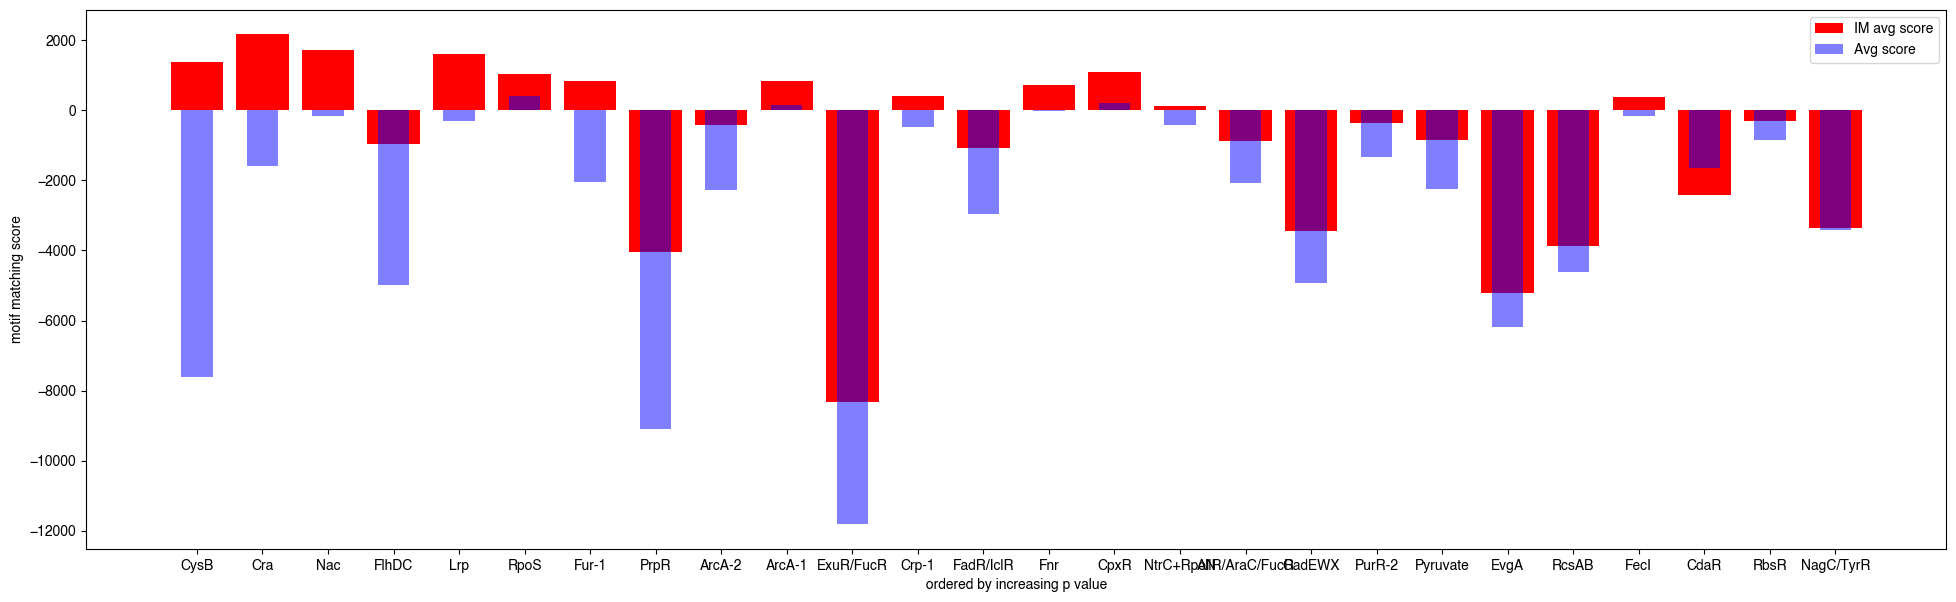

In [34]:
plt.figure(figsize=(24,7))
plt.bar(list(pvalueTable['IM']), list(pvalueTable['IM avg score']), width=0.8, 
        color='r', label='IM avg score')

plt.bar( list(pvalueTable['IM']), list(pvalueTable['avg score']), 
        width=0.6*0.8, color='b', alpha=0.5, label='Avg score')

plt.xticks( list(pvalueTable['IM']) )
plt.ylabel('motif matching score')
plt.xlabel(' ordered by increasing p value ')
plt.legend()
plt.show()

In [35]:
tf_motif_ttest=[]
for name in pwm_db.keys():
    if name == 'Crp':
        tfname = 'CRP'
    elif name == 'Fnr':
        tfname = 'FNR'
        
    else:
        tfname = name
    d={}
    d['TF'] = name    
    temp = []
    for i in range(len(data_table['gene'])):
        if data_table['gene'][i] in regulon_genes[tfname]:
            temp.append(data_table[name+' score'][i])
    d['Regulon avg score'] = sum(temp)/len(temp)
    d['avg score'] = sum(data_table[name+' score'])/len(data_table[name+' score'])
    d['p value'] = ttest_ind(temp, list(data_table[name+' score'])).pvalue 
    tf_motif_ttest.append(d)
    
pvalTable = pd.DataFrame(tf_motif_ttest)
pvalTable = pvalTable.dropna()
pvalTable = pvalTable.sort_values(by=['p value'])
pvalTable = pvalTable.reset_index()
pvalTable = pvalTable.drop(columns=['index'])
pvalTable

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
divide by zero encountered in divide
invalid value encountered in double_scalars


,TF,Regulon avg score,avg score,p value
0,Mlc,17.208000,-1.370723,1.252569e-127
1,Cbl,48.680000,-50.195498,7.121116e-127
2,PurR,9.592683,-1.242960,1.012670e-106
3,NarP,8.159459,2.757785,5.709479e-97
4,BaeR,17.822222,0.684629,4.525441e-78
...,...,...,...,...
63,CpxR,4.306024,3.705016,1.363919e-03
64,Lrp,4.380952,4.020263,2.280179e-03
65,CysB,0.179310,-1.633300,4.495696e-03
66,GadE,2.922917,2.018624,1.404662e-02


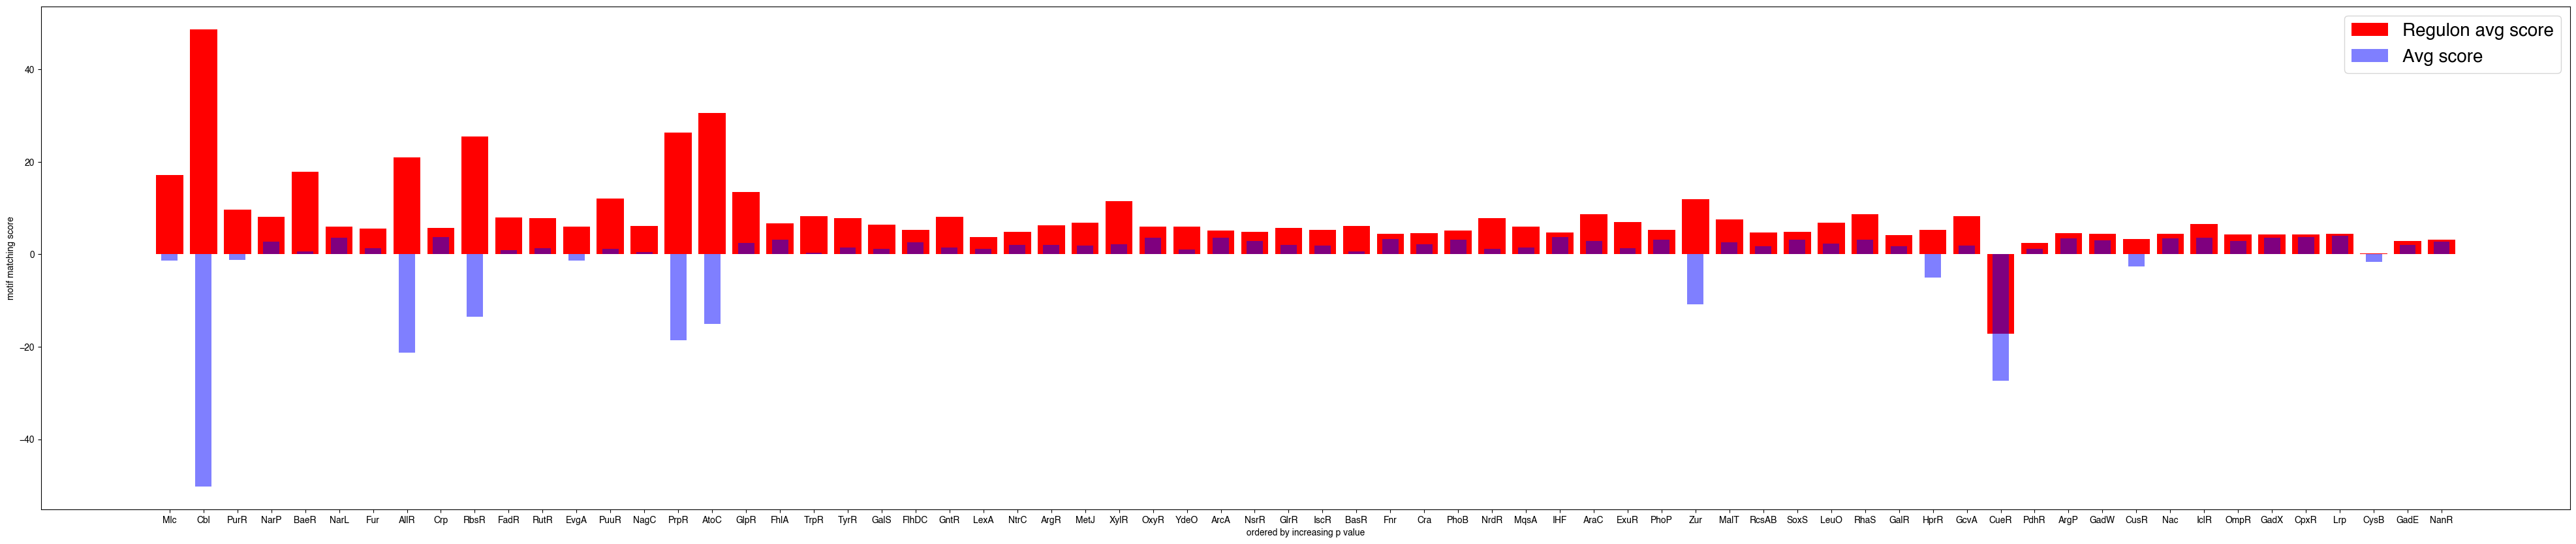

In [36]:
plt.figure(figsize=(50,10))
plt.bar(list(pvalTable['TF']), list(pvalTable['Regulon avg score']), width=0.8, 
        color='r', label='Regulon avg score')

plt.bar( list(pvalTable['TF']), list(pvalTable['avg score']), 
        width=0.6*0.8, color='b', alpha=0.5, label='Avg score')

plt.xticks( list(pvalTable['TF']) )
plt.ylabel('motif matching score')
plt.xlabel(' ordered by increasing p value ')
plt.legend(fontsize = 20)
plt.show()